# SVI minibatch variation for big P

In [1]:
from pCMF.misc import utils
from pCMF.models.pcmf.inferences import cavi_new, svi_new

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from scipy.stats import gamma

import operator
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Experiment parameters
N = 1000 # number of observations
P = 1000 # observation space dimensionality
K = 10 # latent space dimensionality
C = 2 # number of clusters

# Generate data set
z_p = 0.5
eps = 5.
Y, D, X, R, V, U, clusters = utils.generate_data(N, P, K, C=C, zero_prob=z_p,
                                                 eps=eps, return_all=True)

Y_train, Y_test, U_train, U_test, c_train, c_test = train_test_split(Y, U.T, clusters, test_size=0.2, random_state=42)

In [3]:
T = 60. * 30
S = 30.

In [4]:
# Run PCA
pca_U = PCA(n_components=K).fit_transform(np.log(Y_train + 1.))
pca_tsne = TSNE(n_components=2).fit_transform(pca_U)

In [5]:
# Run CAVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('CAVI:')
infcavi = cavi_new.CoordinateAscentVI(Y_train, alpha, beta, pi_D=pi_D, empirical_bayes=False)
infcavi.run(n_iterations=4000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
cavi_U = infcavi.a[0] / infcavi.a[1] # VI estimate is the mean of the variational approximation
cavi_V = infcavi.b[0] / infcavi.b[1]
cavi_S = infcavi.estimate_S(infcavi.p_S)
cavi_tsne = TSNE(n_components=2).fit_transform(cavi_U)

CAVI:
Iteration 13/4000. Log-likelihood: -1.867. Elapsed: 1247 seconds


In [6]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('SVI-1:')
infsvi1 = svi_new.StochasticVI(Y_train, alpha, beta, pi_D=pi_D, minibatch_size=1, empirical_bayes=False)
infsvi1.run(n_iterations=4000000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
svi1_U = infsvi1.a[0] / infsvi1.a[1] # VI estimate is the mean of the variational approximation
svi1_V = infsvi1.b[0] / infsvi1.b[1]
svi1_S = infsvi1.estimate_S(infsvi1.p_S)
svi1_tsne = TSNE(n_components=2).fit_transform(svi1_U)

SVI-1:
Iteration 4258/4000000. Log-likelihood: -1.947. Elapsed: 1200 seconds


In [7]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('SVI-50:')
infsvi50 = svi_new.StochasticVI(Y_train, alpha, beta, pi_D=pi_D, minibatch_size=50, empirical_bayes=False)
infsvi50.run(n_iterations=4000000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
svi50_U = infsvi50.a[0] / infsvi50.a[1] # VI estimate is the mean of the variational approximation
svi50_V = infsvi50.b[0] / infsvi50.b[1]
svi50_S = infsvi50.estimate_S(infsvi50.p_S)
svi50_tsne = TSNE(n_components=2).fit_transform(svi50_U)

SVI-50:
Iteration 152/4000000. Log-likelihood: -1.885. Elapsed: 1202 seconds


In [8]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('SVI-100:')
infsvi100 = svi_new.StochasticVI(Y_train, alpha, beta, pi_D=pi_D, minibatch_size=100, empirical_bayes=False)
infsvi100.run(n_iterations=4000000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
svi100_U = infsvi100.a[0] / infsvi100.a[1] # VI estimate is the mean of the variational approximation
svi100_V = infsvi100.b[0] / infsvi100.b[1]
svi100_S = infsvi100.estimate_S(infsvi100.p_S)
svi100_tsne = TSNE(n_components=2).fit_transform(svi100_U)

SVI-100:
Iteration 85/4000000. Log-likelihood: -1.879. Elapsed: 1202 seconds


In [9]:
# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('SVI-500:')
infsvi500 = svi_new.StochasticVI(Y_train, alpha, beta, pi_D=pi_D, minibatch_size=500, empirical_bayes=False)
infsvi500.run(n_iterations=4000000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
svi500_U = infsvi500.a[0] / infsvi500.a[1] # VI estimate is the mean of the variational approximation
svi500_V = infsvi500.b[0] / infsvi500.b[1]
svi500_S = infsvi500.estimate_S(infsvi500.p_S)
svi500_tsne = TSNE(n_components=2).fit_transform(svi500_U)

SVI-500:
Iteration 21/4000000. Log-likelihood: -1.883. Elapsed: 1248 seconds


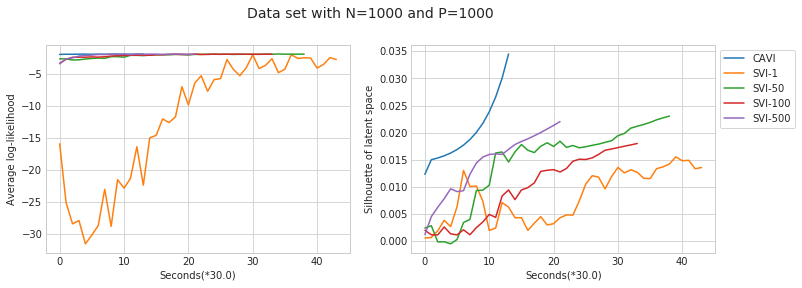

In [10]:
fig = plt.figure(figsize=(12, 4))

ax = plt.subplot(1, 2, 1)
ax.plot(infcavi.ll_time, label='CAVI')
ax.plot(infsvi1.ll_time, label='SVI-1')
ax.plot(infsvi50.ll_time, label='SVI-50')
ax.plot(infsvi100.ll_time, label='SVI-100')
ax.plot(infsvi500.ll_time, label='SVI-500')
plt.ylabel('Average log-likelihood')
plt.xlabel('Seconds(*{0})'.format(S))

ax = plt.subplot(1, 2, 2)
ax.plot(infcavi.silh_time, label='CAVI')
ax.plot(infsvi1.silh_time, label='SVI-1')
ax.plot(infsvi50.silh_time, label='SVI-50')
ax.plot(infsvi100.silh_time, label='SVI-100')
ax.plot(infsvi500.silh_time, label='SVI-500')
plt.ylabel('Silhouette of latent space')
plt.xlabel('Seconds(*{0})'.format(S))

plt.legend(loc='upper left', bbox_to_anchor=[1., 1.], frameon=True)
plt.suptitle('Data set with N={} and P={}'.format(N, P), fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

In [11]:
cavi_dll = utils.log_likelihood(Y_train, cavi_U, cavi_V, infcavi.p_D, cavi_S)
svi1_dll = utils.log_likelihood(Y_train, svi1_U, svi1_V, infsvi1.p_D, svi1_S)
svi50_dll = utils.log_likelihood(Y_train, svi50_U, svi50_V, infsvi50.p_D, svi50_S)
svi100_dll = utils.log_likelihood(Y_train, svi100_U, svi100_V, infsvi100.p_D, svi100_S)
svi500_dll = utils.log_likelihood(Y_train, svi500_U, svi500_V, infsvi500.p_D, svi500_S)

scores = {'CAVI': cavi_dll, 'SVI-1': svi1_dll, 'SVI-50': svi50_dll, 'SVI-100': svi100_dll, 'SVI-500': svi500_dll}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Full data log-likelihood:')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))

Full data log-likelihood:
- CAVI: -1.88
- SVI-500: -1.88
- SVI-50: -1.88
- SVI-100: -1.88
- SVI-1: -2.46


In [12]:
cavi_holl = infcavi.predictive_ll(Y_test)
svi1_holl = infsvi1.predictive_ll(Y_test)
svi50_holl = infsvi50.predictive_ll(Y_test)
svi100_holl = infsvi100.predictive_ll(Y_test)
svi500_holl = infsvi500.predictive_ll(Y_test)

scores = {'CAVI': cavi_holl, 'SVI-1': svi1_holl, 'SVI-50': svi50_holl, 'SVI-100': svi100_holl, 'SVI-500': svi500_holl}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Held-out log-likelihood:')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))

Held-out log-likelihood:
- CAVI: -1.87
- SVI-1: -1.87
- SVI-50: -1.87
- SVI-500: -1.87
- SVI-100: -1.87


In [13]:
true_silh = silhouette_score(U_train, c_train)
cavi_silh = silhouette_score(cavi_U, c_train)
svi1_silh = silhouette_score(svi1_U, c_train)
svi50_silh = silhouette_score(svi50_U, c_train)
svi100_silh = silhouette_score(svi100_U, c_train)
svi500_silh = silhouette_score(svi500_U, c_train)
pca_silh = silhouette_score(pca_U, c_train)

scores = {'CAVI': cavi_silh, 'SVI-1': svi1_silh, 'SVI-50': svi50_silh, 'SVI-100': svi100_silh, 
          'SVI-500': svi500_silh, 'PCA': pca_silh}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Silhouette scores (higher is better):')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))
    
print('\nSilhouette of true U:')
print('%0.3f' % true_silh)

Silhouette scores (higher is better):
- PCA: 0.0414
- CAVI: 0.0345
- SVI-50: 0.0234
- SVI-500: 0.022
- SVI-100: 0.018
- SVI-1: 0.0136

Silhouette of true U:
0.550


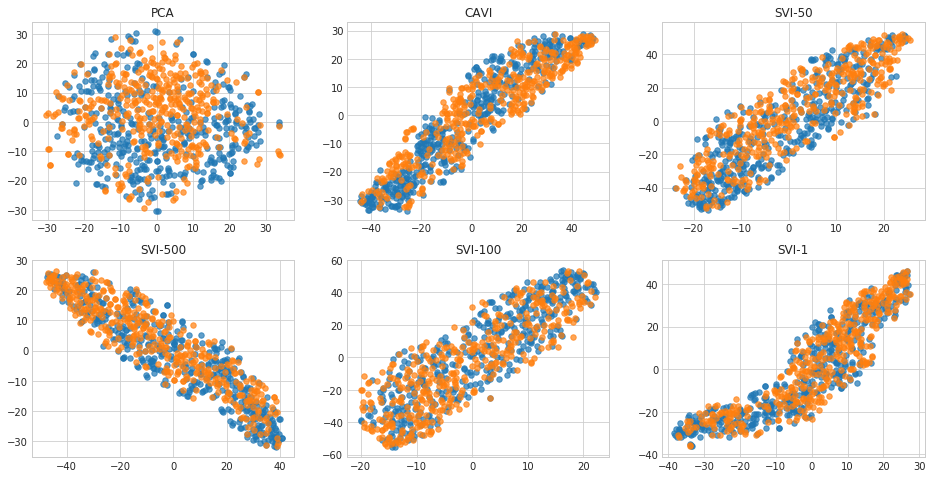

In [14]:
U_list = [cavi_tsne, svi1_tsne, svi50_tsne, svi100_tsne, svi500_tsne, pca_tsne]
title_list = ['CAVI', 'SVI-1', 'SVI-50', 'SVI-100', 'SVI-500', 'PCA']

n_results = len(U_list)

assert len(U_list) == len(title_list)

fig = plt.figure(figsize=(16, 8))

s = 30
alpha = 0.7
labels=None
for i in range(len(U_list)):
    ax = plt.subplot(2, 3, i+1)
    handlers = []
    for c in range(C):
        h = ax.scatter(U_list[title_list.index(sorted_scores[i][0])][c_train==c, 0], U_list[title_list.index(sorted_scores[i][0])][c_train==c, 1], s=s, alpha=alpha)
        handlers.append(h)
    if labels is not None:
        ax.legend(handlers, labels, scatterpoints=1)
    plt.title(sorted_scores[i][0])
plt.show()